# Tarea_14
## Fracisco Ricardo Torres Arvizu

## __Ejercicio 1:__ 
Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [26]:
function espaaciofaserungeKutta2e(f,t0,tf,y0,delta)
   dyarreglo=[]
    yArreglo = []
    tArreglo=[]
    push!(yArreglo,y0)
    push!(tArreglo,t0)
    push!(dyarreglo,f(t0,y0))
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (tArreglo[length(tArreglo)]<tf)
        push!(tArreglo,tArreglo[length(tArreglo)]+delta)
        push!(yArreglo,yArreglo[length(yArreglo)]+(delta/6)*h1(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)]))
        push!(dyarreglo,f(tArreglo[length(tArreglo)-1],yArreglo[length(yArreglo)-1]))
    end
   return [tArreglo, yArreglo, dyarreglo]
end

espaaciofaserungeKutta2e (generic function with 1 method)

In [27]:
function Runge_Kutta_5(f,t0,tf,x0,h)
    ts=t0:h:tf
    xs=[]
    push!(xs,x0)# Posición   #Velocidad
    for i in 2:length(ts)
       #Pasos de R.k.4 
    k1=f(x0,ts[i-1])
    k2=f(x0+(h/2)*k1,ts[i-1]+h/2) 
    k3=f(x0+(h/2)*k2,ts[i-1]+h/2) 
    k4=f(x0+h*k3,ts[i-1]+h)
        
    x0=x0+(h/6)*(k1+2*k2+2*k3+k4)
        
        push!(xs,x0)
    end
    return xs
end

Runge_Kutta_5 (generic function with 1 method)

In [28]:
xcomp(x)=x[1]
ycomp(x)=x[2]

ycomp (generic function with 1 method)

In [29]:
xcomp(x)=x[1]

xcomp (generic function with 1 method)

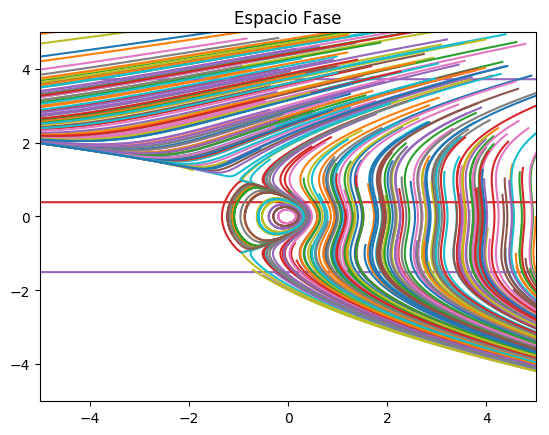

In [48]:
using PyPlot
condiciones=0
  for i in 1:300
   condiciones = (rand(2)*6-2*rand(2))
    
     plot(xcomp.(Runge_Kutta_5((x,t)->[x[2]-(x[2])^3,-x[1]-(x[2])^2],-5,10.0, condiciones,0.01)),ycomp.(Runge_Kutta_5((x,t)->[x[2]-(x[2])^3,-x[1]-(x[2])^2],-5,10.0,condiciones,0.01)));
    xlim(-5,5)
    ylim(-5,5)
    title("Espacio Fase")
end

In [61]:
using PyPlot
plt = PyPlot
function grafica7(f,t0,tf,y0,delta)
   
 for i in 1:200
   plt.subplot(2,1,1)
          plt.title("Espacio fase ")
  
    plt.plot(xcomp.(espaaciofaserungeKutta2e(f,t0,tf,rand(2)*8-3*rand(2),delta)[2]),(espaaciofaserungeKutta2e(f,t0,tf,rand(2)*8-3*rand(2),delta)[1]))
        plt.xlabel("t")
        plt.ylabel("x(t)")
    plt.subplot(2,1,2)
    plt.plot(xcomp.(espaaciofaserungeKutta2e(f,t0,tf,rand(2)*8-3*rand(2),delta)[3]),(espaaciofaserungeKutta2e(f,t0,tf,rand(2)*8-3*rand(2),delta)[1]))
        plt.xlabel("t")
        plt.ylabel("dx(t)/dt")
        plt.title("Espacio fase ")
        xlim(-10,10)
    ylim(-3,7)
  end 
end

grafica7 (generic function with 1 method)

## Jacobiano del sistema 
El sistema se define como  $$\vec F=\left(\begin{array}{cc} y-y^3 \\-x-y^2 \end{array} \right)$$ 
Se calcula la matriz jacobiana, que se define como 
$$J(\vec{x})= \begin{pmatrix}
\frac{\partial f_{1}}{\partial x_1} & \cdots & \frac{\partial f_{1}}{\partial x_n} \\
\vdots   & \ddots & \vdots  \\
\frac{\partial f_{n}}{\partial x_n} & \cdots & \frac{\partial F_{n}}{\partial x_n} 
\end{pmatrix} $$ 

sustituyendo $\vec F$
 $$J(x,y)=\left(\begin{array}{cc} 0 & 1-3y^2 \\-1 & -2y \end{array} \right)$$ 
 Si  $(x,y)=(0,0)$ la matriz se vuelve: $$J(0,0)=\left(\begin{array}{cc} 0 & 1 \\-1 &  0 \end{array} \right)$$ 
     podemos obtener $\Delta$ y $\tau$ apartir de su definición $$\Delta= \det (J(0,0))=1$$ $$\tau=\text{tr} (J(0,0))=0$$ Conforme al diagrama se ve que  $\Delta$ es positivo y $\tau$ es cero, entonces el $\vec 0$ representa un centro.

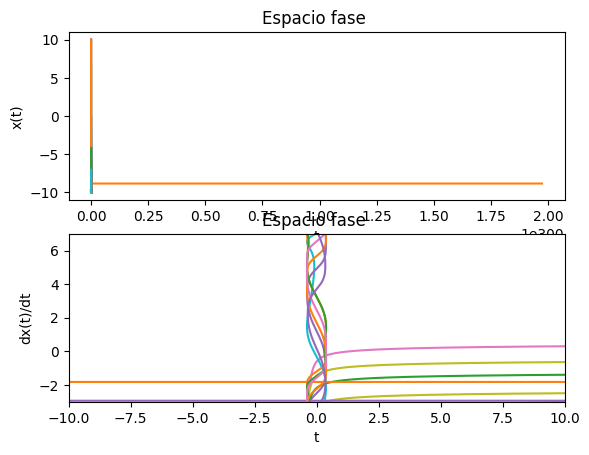

In [62]:
grafica7((t,x)->[x[2]-(x[2])^3,-x[1]-(x[2])^2]
,-10,10,[rand(),rand()],0.001)

## __Ejercicio 2:__
Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

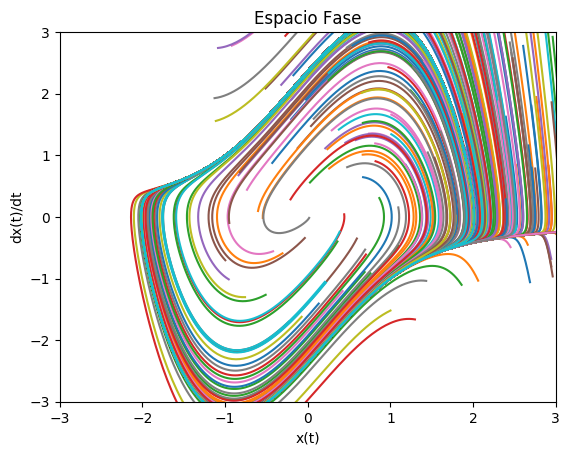

In [63]:
using PyPlot
condiciones=0
  for i in 1:300
   condiciones = (rand(2)*6-2*rand(2))
    xlabel("x(t)")
        ylabel("dx(t)/dt")
     plot(xcomp.(Runge_Kutta_5((y,t)->[y[2],1.5*(1-y[1]^2)y[2]-y[1]],-5,10.0, condiciones,0.01)),ycomp.(Runge_Kutta_5((y,t)->[y[2],1.5*(1-y[1]^2)y[2]-y[1]],-5,10.0,condiciones,0.01)));
    xlim(-3,3)
    ylim(-3,3)
    title("Espacio Fase")
end

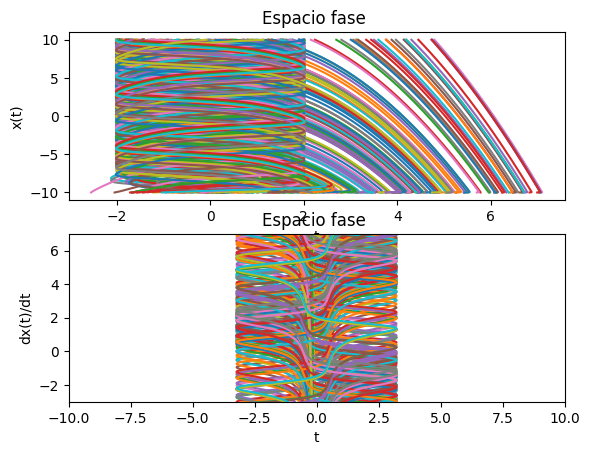

In [64]:
grafica7((t,y)->[y[2],1.5*(1-y[1]^2)y[2]-y[1]]
,-10,10,[rand(),rand()],0.001)

## Ejercicio 3

usando parte del ejercicio 1 pero para $(-1,-1)$ y $(-1,1)$, $$J(-1,1)=\begin{bmatrix} 0 & \quad -2 \\ -1 &\quad -2 \end{bmatrix}$$
Se calcula el determinante ($\Delta$):
$$\Delta=\det (J(-1,1))=-2$$
Se calcula la traza ($\tau=\text{tr}$)
$$\tau=-2$$
Como el determinante es menor que cero, segùn el diagrama, el punto (-1,1) es un punto silla.
Evaluandolo en $(-1,-1)$, obtenemos:
$$J(-1,-1) =\begin{bmatrix} 0 & \quad -2 \\ -1 & \quad -2 \end{bmatrix}$$
Se calcula el determinante ($\Delta$):
$$\Delta=\det (J(-1,-1))=-2$$
Se calcula la traza ($\tau=\text{tr}$)
$$\tau=1$$
Como el determinante es menor que cero, segùn el diagrama, el punto (-1,-1) es un punto silla.

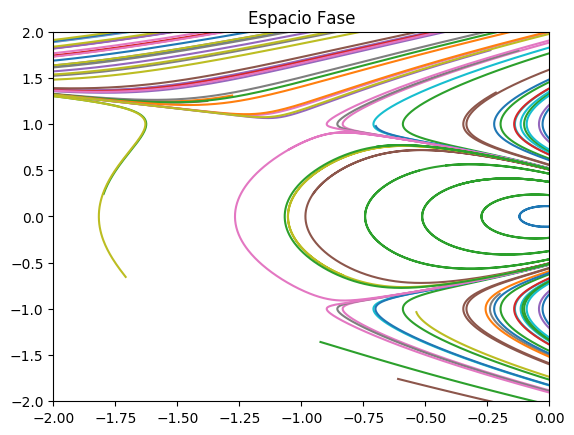

In [65]:
condiciones=0
  for i in 1:300
   condiciones = (rand(2)*6-2*rand(2))
    
     plot(xcomp.(Runge_Kutta_5((x,t)->[x[2]-(x[2])^3,-x[1]-(x[2])^2],-5,10.0, condiciones,0.01)),ycomp.(Runge_Kutta_5((x,t)->[x[2]-(x[2])^3,-x[1]-(x[2])^2],-5,10.0,condiciones,0.01)));
    xlim(-2,0)
    ylim(-2,2)
    title("Espacio Fase")
end

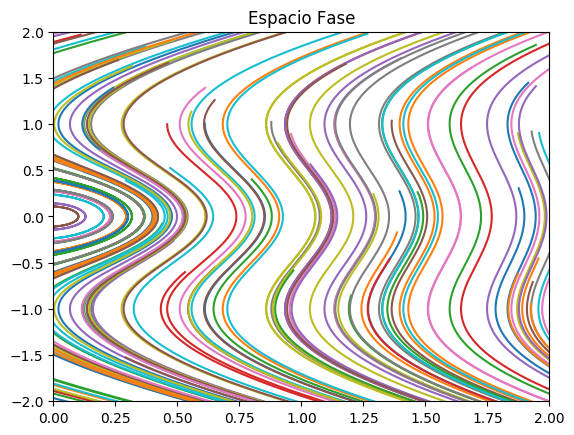

In [66]:
condiciones=0
  for i in 1:300
   condiciones = (rand(2)*6-2*rand(2))
    
     plot(xcomp.(Runge_Kutta_5((x,t)->[x[2]-(x[2])^3,-x[1]-(x[2])^2],-5,10.0, condiciones,0.01)),ycomp.(Runge_Kutta_5((x,t)->[x[2]-(x[2])^3,-x[1]-(x[2])^2],-5,10.0,condiciones,0.01)));
    xlim(0,2)
    ylim(-2,2)
    title("Espacio Fase")
end

## Ejercicio 4


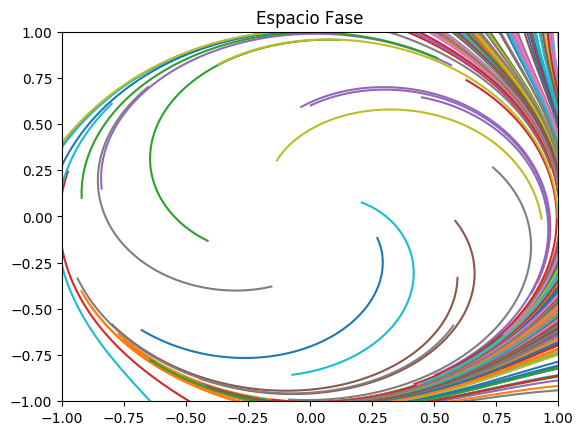

In [67]:
  for i in 1:300
   condiciones = (rand(2)*6-2*rand(2))
    
     plot(xcomp.(Runge_Kutta_5((x,t)->[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)],-1,1, condiciones,0.01)),ycomp.(Runge_Kutta_5((x,t)->[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)],-1,1,condiciones,0.01)));
    xlim(-1,1)
    ylim(-1,1)
    title("Espacio Fase")
end

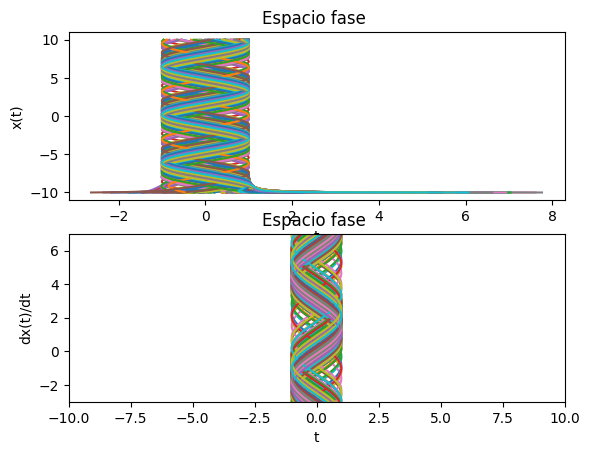

In [68]:
grafica7((t,x)->[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-(x[1]-x[2])-x[2]*(x[1]^2+x[2]^2)]
,-10,10,[rand(),rand()],0.001)

Para ver si hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$ se necesita  calcular $\Delta$ y $\tau$  
para esto se calcula el jacobiano, el cual está dado por:
$$J=\left(\begin{array}{cc} \frac{d f_1}{d x} &\frac{d f_1}{d y} \\ \frac{d f_2}{d x} & \frac{d f_2}{d y} \end{array} \right)$$
El jacobiano queda:
$$J = \left(\begin{array}{cc} 1-(x^2+y^2) & 1 \\ -1 & 1-(x^2+y^2) \end{array} \right)$$
En el caso de la matriz de $2$x$2$, la traza es $\tau = a_{11}+a_{22}$ y el determinante es $\Delta= (a_{11}a_{22})-(a_{12
}a_{21})$.
Para $\vec{x}=(0,0)$:
$$\tau=(1-(0^2+0^2))+(1-(0^2+0^2))$$$$\tau=2$$$$\Delta= (1-(0^2+0^2))(1-(0^2+0^2))-(-1)(1)$$$$\Delta= 2$$
Como $(\Delta=2,\tau=2)$ y conociendo que $\tau^2-4\Delta = 0$ en el diagrama , $(0,0)$ es una espiral inestable, un repulsor.
Para $x^2+y^2=1$
$$\tau=(1-(1))+(1-(1))$$$$\tau=0$$$$\Delta= (1-(1))(1-(1))-(-1)(1)$$$$\Delta= 1$$
Como $(\Delta,\tau)=(1,0)$, $x^2+y^2=1$ es un centro, y por lo tanto un conjunto atractor.